In [1]:
!./build.sh
# !./sin_perf > sin_data.txt
!./sin_perf_pure_vec > sin_pure_data_vec.txt

+ nasm -f macho64 array_copy2c.asm -o array_copy2.o
+ nasm -f macho64 array_read.asm -o array_read.o
+ nasm -f macho64 array_write.asm -o array_write.o
+ gfortran -O3 -march=native -funroll-loops -ffast-math sin_perf.f90 -o sin_perf
+ gfortran -O3 -march=native -funroll-loops -ffast-math sin_perf_pure.f90 -o sin_perf_pure
+ gfortran -O3 -march=native -funroll-loops -ffast-math -c sin_perf_pure_vec2.f90 -o sin_perf_pure_vec2.o
+ gfortran -O3 -march=native -funroll-loops -ffast-math -c sin_perf_pure_vec.f90 -o sin_perf_pure_vec.o
+ gfortran -O3 -march=native -funroll-loops -ffast-math -flto -o sin_perf_pure_vec sin_perf_pure_vec.o sin_perf_pure_vec2.o array_copy2.o array_read.o array_write.o


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


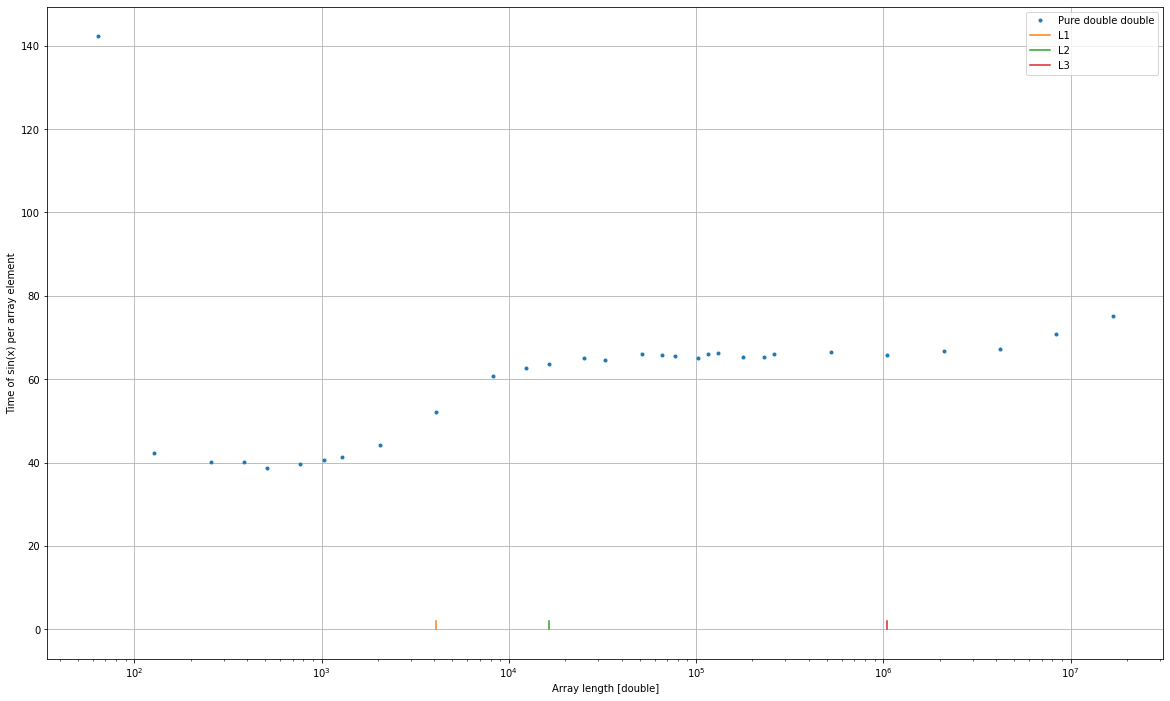

In [3]:
#D = loadtxt("sin_data.txt")
#x = D[:,0]
#sin_gf = D[:,2]
D = loadtxt("sin_pure_data_vec.txt")
x2 = D[:,0]
sin_pure = D[:,2]

GHz = 1e9
KB = 1024
MB = 1024**2

# https://www.techpowerup.com/cpu-specs/core-i9-10980hk.c2276
#cpu_freq = 2.4 * GHz
cpu_freq = 5.3 * GHz * 1.35
L1 = 64 * KB
L2 = 256 * KB
L3 = 16 * MB
k = 8 * 2# 8 bytes per element, 2 arrays

figure(figsize=(20, 12))
#loglog(x, sin_gf, ".", label="GFortran Intrinsic")
semilogx(x2, sin_pure * cpu_freq, ".", label="Pure double double")
semilogx([L1/k, L1/k], [0, 2], "-", label="L1")
semilogx([L2/k, L2/k], [0, 2], "-", label="L2")
semilogx([L3/k, L3/k], [0, 2], "-", label="L3")
legend()
xlabel("Array length [double]")
ylabel("Time of sin(x) per array element")
grid()
#xlim([1e2, None])
#ylim([0, 4])
savefig("perf1.pdf")
show()